In [1]:
import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy/')



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches
import numpy as np
import pickle
from scipy import ndimage
import solver.rtm_solver as rtm



from pathlib import Path



Eventually find the plots of electron distribution, seen in MPI_job

In [2]:
#insert here

Plot graphs

In [3]:


sh = pickle.load(open("/rds/general/user/le322/home/synthPy/output/Shadowgraphy.pkl", "rb"))

s = pickle.load(open("/rds/general/user/le322/home/synthPy/output/Schlieren.pkl", "rb"))


r = pickle.load(open("/rds/general/user/le322/home/synthPy/output/Refractometer.pkl", "rb"))

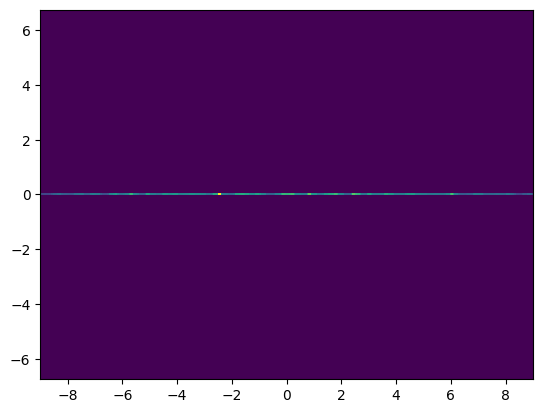

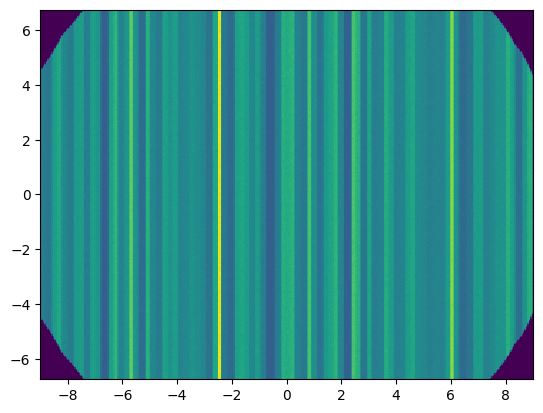

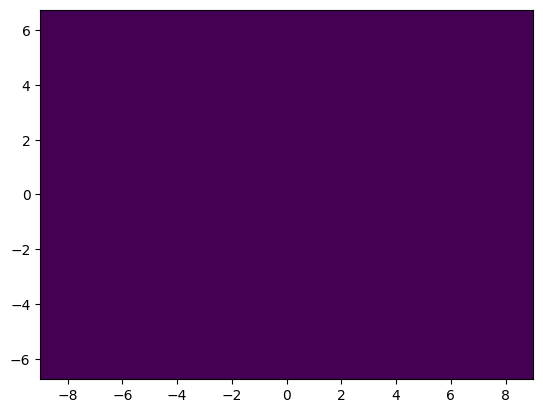

In [4]:
fig, ax = plt.subplots()
r.plot(ax)
fig, ax = plt.subplots()
sh.plot(ax)
fig, ax = plt.subplots()
s.plot(ax)

Transverse Shadowgraphy

Text(0, 0.5, 'Intensity')

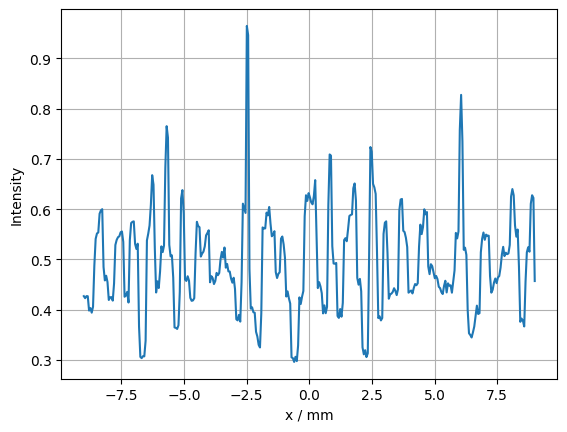

In [5]:
sh = sh.H/np.max(sh.H)

midpoint = len(sh[:,0])//2
x_axis = np.linspace(-9, 9, len(sh[midpoint,:]))
plt.plot(x_axis, sh[midpoint,:])
plt.grid()
plt.xlabel('x / mm')
plt.ylabel('Intensity')





/rds/general/ephemeral/user/le322/ephemeral/ipykernel_1225251/4255723534.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)
/rds/general/ephemeral/user/le322/ephemeral/ipykernel_1225251/4255723534.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.1)


(np.float64(3.529284711482228e-08), 0.1)

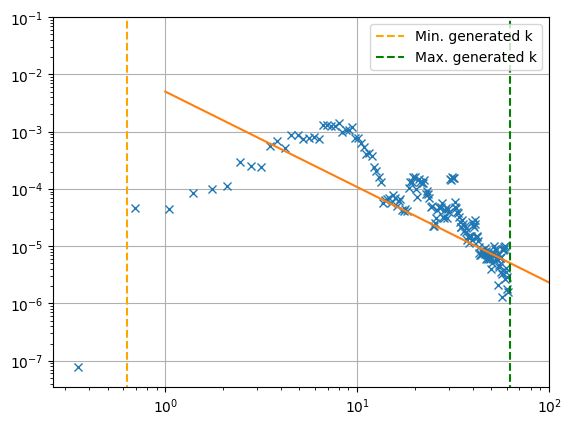

In [28]:
import utils.cmpspec as cm

def theoretical_ps(x):
    return x**(-5/3)


x = np.linspace(1, 100, 10)

p = theoretical_ps(x)


_, wn, ps = cm.compute1Dspectrum(sh[midpoint, :], 18, smooth=  True)

wn_min = 2*np.pi/10
wn_max = 2*np.pi/0.1
plt.plot(wn, ps, 'x')
plt.plot(x, 0.005*p)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.vlines([wn_min],[0],[1], linestyle = 'dashed', color = 'orange', label = 'Min. generated k')
plt.vlines([wn_max],[0],[1], linestyle = 'dashed', color = 'green', label = 'Max. generated k')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 0.1)



[[Model]]
    <lmfit.ExpressionModel('A*x**(C)')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 329
    # variables        = 2
    chi-square         = 4.2233e-06
    reduced chi-square = 1.2915e-08
    Akaike info crit   = -5974.24213
    Bayesian info crit = -5966.65002
    R-squared          = 0.75222141
[[Variables]]
    A:  0.02153125 +/- 0.00313683 (14.57%) (init = 1)
    C: -1.63758589 +/- 0.06921251 (4.23%) (init = -1.666667)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, C) = -0.9789
0.6957274445215511


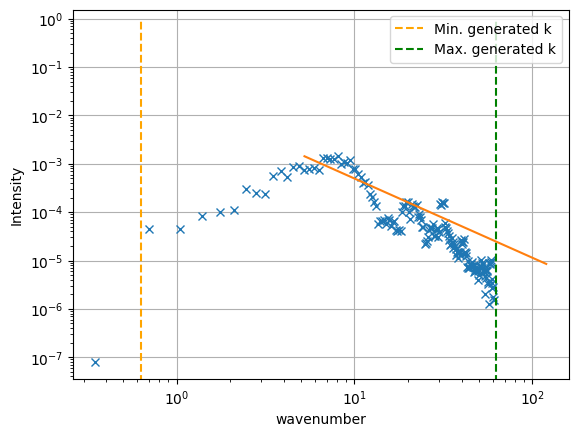

In [33]:
from lmfit.models import ExpressionModel
mod = ExpressionModel('A*x**(C)')
mod.make_params()
mod.set_param_hint('A', value = 1)
mod.set_param_hint('C', value = -5/3)
res0     =   mod.fit(np.array(ps[15:]), x = wn[15:], nan_policy='omit')
print(res0.fit_report())

plt.plot(wn, ps, 'x')

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.vlines([wn_min],[0],[1], linestyle = 'dashed', color = 'orange', label = 'Min. generated k')
plt.vlines([wn_max],[0],[1], linestyle = 'dashed', color = 'green', label = 'Max. generated k')
plt.legend()

plt.plot(wn[15:], res0.best_fit)
plt.xlabel('wavenumber')
plt.ylabel('Intensity')


print(np.max(ps))